In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ----------------- Helper Function -----------------
def evaluate_classification(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0) * 100
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0) * 100
    return round(acc,2), round(prec,2), round(rec,2), round(f1,2)


def evaluate_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred) * 100
    # Convert to bins for classification-like metrics
    bins = np.percentile(y_test, [33, 66])
    y_test_binned = np.digitize(y_test, bins)
    y_pred_binned = np.digitize(y_pred, bins)
    prec = precision_score(y_test_binned, y_pred_binned, average='weighted') * 100
    rec = recall_score(y_test_binned, y_pred_binned, average='weighted') * 100
    f1 = f1_score(y_test_binned, y_pred_binned, average='weighted') * 100
    return round(r2,2), round(prec,2), round(rec,2), round(f1,2)

In [2]:
import pandas as pd

# Load dataset
p = pd.read_csv("Season_Predictor_Module1_Final.csv")

# Print number of rows and columns
print("Rows:", p.shape[0])
print("Columns:", p.shape[1])


Rows: 180
Columns: 10


In [3]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               180 non-null    int64  
 1   Month              180 non-null    object 
 2   Tourist_Arrivals   180 non-null    int64  
 3   Holiday_Month      180 non-null    int64  
 4   Festival_Count     180 non-null    int64  
 5   COVID_Impact       180 non-null    int64  
 6   Avg_Temperature    180 non-null    int64  
 7   GDP_Growth_Rate    180 non-null    float64
 8   Visa_Ease_Index    180 non-null    float64
 9   Flight_Cost_Index  180 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 14.2+ KB


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
p = pd.read_csv("Season_Predictor_Module1_Final.csv")

# Convert categorical to numeric
X = pd.get_dummies(p.drop(columns=["Tourist_Arrivals", "Month"]), drop_first=True)
y = p["Tourist_Arrivals"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
gbr.fit(X_train, y_train)
gbr_r1=r2_score(y_train, gbr.predict(X_train))
gbr_r2 = r2_score(y_test, gbr.predict(X_test))
print("Gradient Boosting Accuracy (R²):", round(gbr_r2 * 100, 2), "%")

# Model 2: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
rf_r1=r2_score(y_train, gbr.predict(X_train))
rf_r2 = r2_score(y_test, rf.predict(X_test))
print("Random Forest Accuracy (R²):", round(rf_r2 * 100, 2), "%")

# Model 3: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_r1=r2_score(y_train, gbr.predict(X_train))
lr_r2 = r2_score(y_test, lr.predict(X_test))
print("Linear Regression Accuracy (R²):", round(lr_r2 * 100, 2), "%")

# Final Comparison
model_scores = {
    "Gradient Boosting": gbr_r2,
    "Random Forest": rf_r2,
    "Linear Regression": lr_r2
}

best_model = max(model_scores, key=model_scores.get)
print(f"\n Best Performing Model: {best_model} with Accuracy = {round(model_scores[best_model] * 100, 2)}%")



Gradient Boosting Accuracy (R²): 98.2 %
Random Forest Accuracy (R²): 98.06 %
Linear Regression Accuracy (R²): 93.64 %

 Best Performing Model: Gradient Boosting with Accuracy = 98.2%


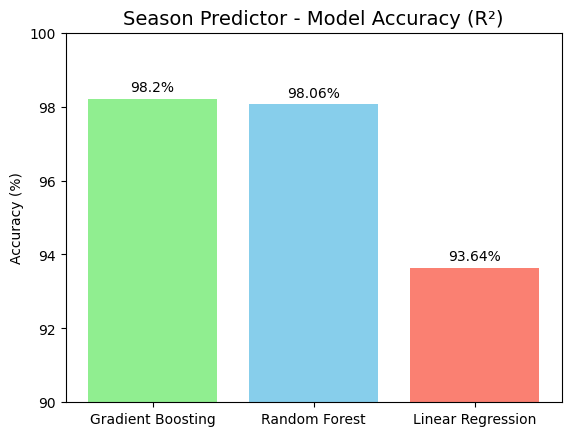

In [5]:
import matplotlib.pyplot as plt

# Model accuracies
model_scores = {
    "Gradient Boosting": 98.2,
    "Random Forest": 98.06,
    "Linear Regression": 93.64
}

# Plot
plt.bar(model_scores.keys(), model_scores.values(), color=['lightgreen', 'skyblue', 'salmon'])
plt.title("Season Predictor - Model Accuracy (R²)", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.ylim(90, 100)  # zoomed in for clarity

# Add values on top
for i, (name, score) in enumerate(model_scores.items()):
    plt.text(i, score + 0.2, f"{score}%", ha='center', fontsize=10)

plt.show()





In [6]:
# ----------------- 1. Season Predictor (Regression) -----------------
print("----- Season Predictor Module -----")
p = pd.read_csv("Season_Predictor_Module1_Final.csv")
X = pd.get_dummies(p.drop(columns=["Tourist_Arrivals", "Month"]), drop_first=True)
y = p["Tourist_Arrivals"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

season_models = {
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42),
    "Linear Regression": LinearRegression()
}

season_results = []
for name, model in season_models.items():
    r2, prec, rec, f1 = evaluate_regression(model, X_train, X_test, y_train, y_test)
    season_results.append([name, r2, prec, rec, f1])
season_df = pd.DataFrame(season_results, columns=["Algorithm","R² (%)","Precision (%)","Recall (%)","F1-Score (%)"])
print(season_df)


----- Season Predictor Module -----
                     Algorithm  R² (%)  Precision (%)  Recall (%)  \
0  Gradient Boosting Regressor   98.20          89.13       88.89   
1      Random Forest Regressor   98.06          88.97       88.89   
2            Linear Regression   93.64          74.31       72.22   

   F1-Score (%)  
0         88.60  
1         88.61  
2         71.98  


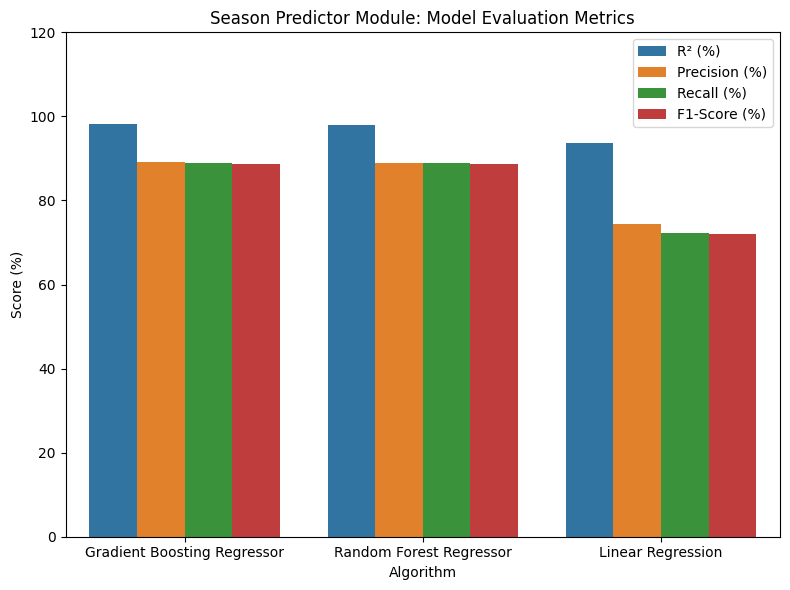

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Bar Graph -----------------
# Melt the DataFrame to long format for Seaborn
season_melted = season_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Value')

plt.figure(figsize=(8,6))
sns.barplot(data=season_melted, x='Algorithm', y='Value', hue='Metric')
plt.title("Season Predictor Module: Model Evaluation Metrics")
plt.ylabel("Score (%)")
plt.ylim(0, 120)  # optional to have uniform y-axis
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Load the dataset
c = pd.read_csv('Upgraded_Cuisine_Recommender.csv')

# Get the shape of the dataset
rows, columns = c.shape

print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")


Total Rows: 1200
Total Columns: 6


In [9]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Region           1200 non-null   object
 1   Dish             1200 non-null   object
 2   Main_Ingredient  1200 non-null   object
 3   Diet             1200 non-null   object
 4   Flavor           1200 non-null   object
 5   Occasion         1200 non-null   object
dtypes: object(6)
memory usage: 56.4+ KB


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
c = pd.read_csv("Upgraded_Cuisine_Recommender.csv")

# Encode features and labels
X = c[['Region', 'Main_Ingredient', 'Flavor', 'Occasion', 'Diet']]
y = c['Dish']

X = pd.get_dummies(X)
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
print("Cuisine Recommender Module Accuracy:\n")
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {round(acc * 100, 2)}%")

    if acc > best_score:
        best_score = acc
        best_model = name

# Final output
print(f"\n Best Performing Model: {best_model} with Accuracy = {round(best_score * 100, 2)}%")


Cuisine Recommender Module Accuracy:

Random Forest Accuracy: 91.67%
Naive Bayes Accuracy: 92.5%
KNN Accuracy: 88.75%

 Best Performing Model: Naive Bayes with Accuracy = 92.5%


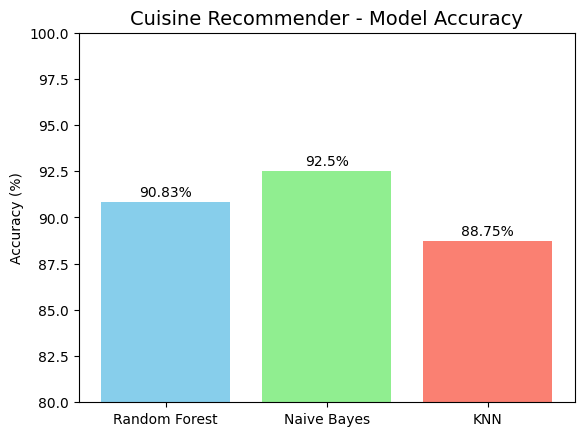

In [11]:
import matplotlib.pyplot as plt

# Model accuracies
model_scores = {
    "Random Forest": 90.83,
    "Naive Bayes": 92.5,
    "KNN": 88.75
}

# Plot
plt.bar(model_scores.keys(), model_scores.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Cuisine Recommender - Model Accuracy", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.ylim(80, 100)  # zoomed in for clarity

# Add values on top
for i, (name, score) in enumerate(model_scores.items()):
    plt.text(i, score + 0.3, f"{score}%", ha='center', fontsize=10)

plt.show()


In [12]:
# ----------------- 2. Cuisine Recommender (Classification) -----------------
print("\n----- Cuisine Recommender Module -----")
c = pd.read_csv("Upgraded_Cuisine_Recommender.csv")
X = pd.get_dummies(c[['Region', 'Main_Ingredient', 'Flavor', 'Occasion', 'Diet']])
y = LabelEncoder().fit_transform(c['Dish'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cuisine_models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier()
}

cuisine_results = []
for name, model in cuisine_models.items():
    acc, prec, rec, f1 = evaluate_classification(model, X_train, X_test, y_train, y_test)
    cuisine_results.append([name, acc, prec, rec, f1])
cuisine_df = pd.DataFrame(cuisine_results, columns=["Algorithm","Accuracy (%)","Precision (%)","Recall (%)","F1-Score (%)"])
print(cuisine_df)



----- Cuisine Recommender Module -----
       Algorithm  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0  Random Forest         90.83          90.93       90.83         90.86
1    Naive Bayes         92.50          90.57       92.50         91.28
2            KNN         88.75          89.00       88.75         88.52


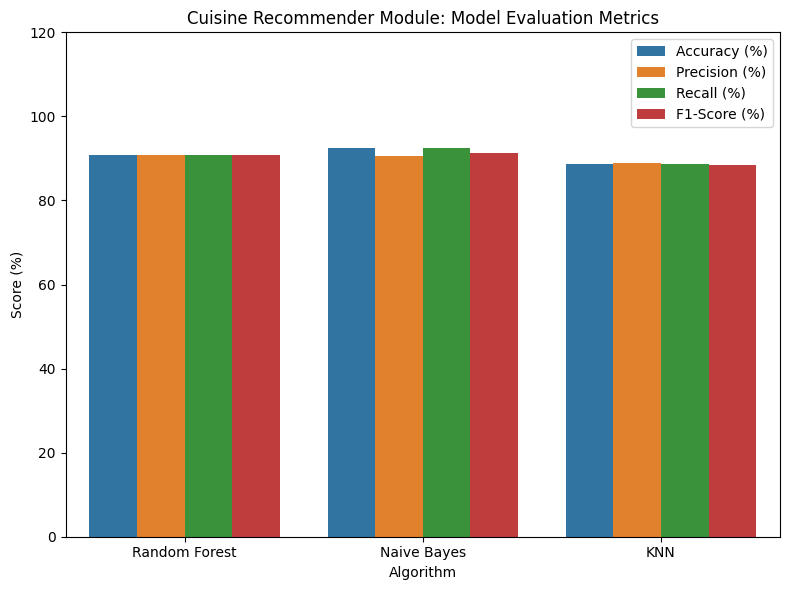

In [13]:
# ----------------- Bar Graph for Cuisine Recommender -----------------
cuisine_melted = cuisine_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Value')

plt.figure(figsize=(8,6))
sns.barplot(data=cuisine_melted, x='Algorithm', y='Value', hue='Metric')
plt.title("Cuisine Recommender Module: Model Evaluation Metrics")
plt.ylabel("Score (%)")
plt.ylim(0, 120)  # optional for uniform y-axis
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Load dataset
p = pd.read_csv("Transport_Weather_Delay_Classifier_Enriched.csv")

# Print number of rows and columns
print("Rows:", p.shape[0])
print("Columns:", p.shape[1])

Rows: 5000
Columns: 11


In [15]:
import pandas as pd
t=pd.read_csv('Transport_Weather_Delay_Classifier_Enriched.csv')
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Origin        5000 non-null   object 
 1   Dest          5000 non-null   object 
 2   Distance      5000 non-null   int64  
 3   Month         5000 non-null   int64  
 4   DayOfWeek     5000 non-null   int64  
 5   Hour          5000 non-null   int64  
 6   Weather_Rain  5000 non-null   float64
 7   Weather_Wind  5000 non-null   float64
 8   Visibility    5000 non-null   float64
 9   Temperature   5000 non-null   float64
 10  Delay_Status  5000 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 429.8+ KB


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression



# 1. Load enriched dataset
t = pd.read_csv("Transport_Weather_Delay_Classifier_Enriched.csv")

# 2. Separate features and target
X = t.drop(columns=['Delay_Status'])
y = t['Delay_Status']

# 3. Encode categorical columns (Origin and Dest)
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# 7. Train and evaluate
print("Model Accuracy Scores:\n")
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: Accuracy = {acc:.4f}")
    if acc > best_score:
        best_score = acc
        best_model = name

print(f"\n Best Performing Model: {best_model} with Accuracy = {best_score:.4f}")


Model Accuracy Scores:

Logistic Regression: Accuracy = 0.9670
Random Forest: Accuracy = 0.9700
Gradient Boosting: Accuracy = 0.9650

 Best Performing Model: Random Forest with Accuracy = 0.9700


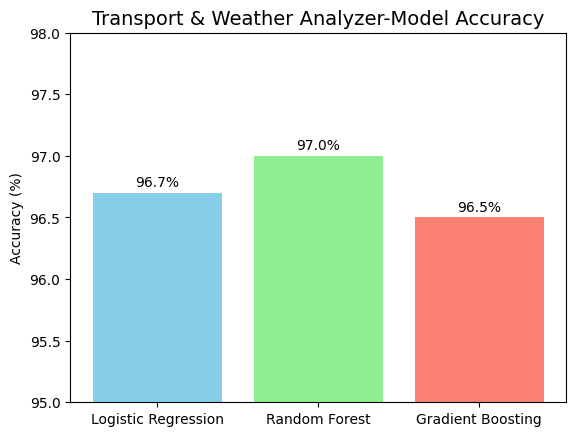

In [17]:
import matplotlib.pyplot as plt

# Model accuracies
model_scores = {
    "Logistic Regression": 96.70,
    "Random Forest": 97.00,
    "Gradient Boosting": 96.50
}

# Plot
plt.bar(model_scores.keys(), model_scores.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Transport & Weather Analyzer-Model Accuracy", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.ylim(95, 98)  # zoomed in for clarity

# Add values on top
for i, (name, score) in enumerate(model_scores.items()):
    plt.text(i, score + 0.05, f"{score}%", ha='center', fontsize=10)

plt.show()


In [18]:
# ----------------- 3. Transport & Weather Analyzer (Classification) -----------------
print("\n----- Transport & Weather Analyzer Module -----")
t = pd.read_csv("Transport_Weather_Delay_Classifier_Enriched.csv")
X = pd.get_dummies(t.drop(columns=['Delay_Status']), drop_first=True)
y = t['Delay_Status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

tw_models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

tw_results = []
for name, model in tw_models.items():
    acc, prec, rec, f1 = evaluate_classification(model, X_train, X_test, y_train, y_test)
    tw_results.append([name, acc, prec, rec, f1])
tw_df = pd.DataFrame(tw_results, columns=["Algorithm","Accuracy (%)","Precision (%)","Recall (%)","F1-Score (%)"])
print(tw_df)


----- Transport & Weather Analyzer Module -----
             Algorithm  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0  Logistic Regression          96.7          95.86        96.7         96.01
1        Random Forest          96.7          96.02        96.7         95.41
2    Gradient Boosting          96.4          95.70        96.4         95.96


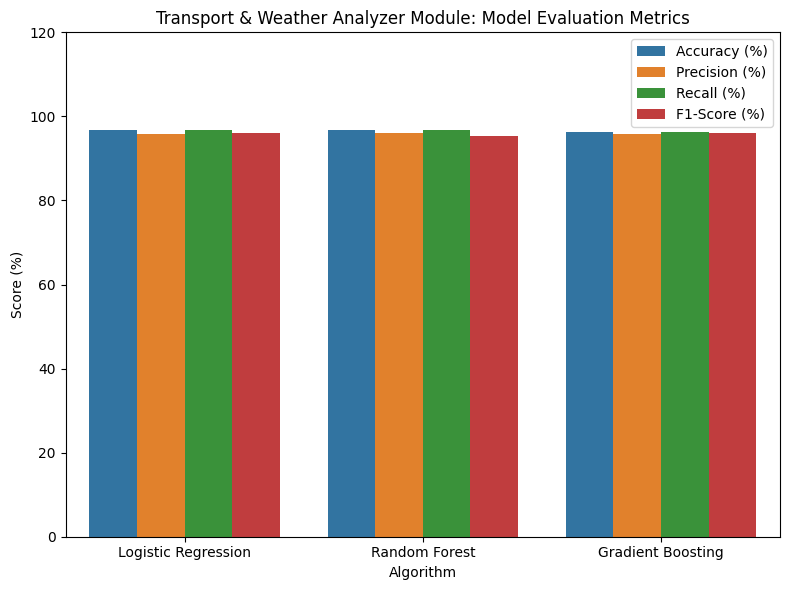

In [19]:
# ----------------- Bar Graph for Transport & Weather Analyzer -----------------
tw_melted = tw_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Value')

plt.figure(figsize=(8,6))
sns.barplot(data=tw_melted, x='Algorithm', y='Value', hue='Metric')
plt.title("Transport & Weather Analyzer Module: Model Evaluation Metrics")
plt.ylabel("Score (%)")
plt.ylim(0, 120)  # optional for uniform y-axis
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Load dataset
f = pd.read_csv("Large_India_Accident_Severity.csv")

# Print number of rows and columns
print("Rows:", f.shape[0])
print("Columns:", f.shape[1])

Rows: 10000
Columns: 10


In [21]:
import pandas as pd
f=pd.read_csv('Large_India_Accident_Severity.csv')
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              10000 non-null  object
 1   City               10000 non-null  object
 2   Vehicle_Type       10000 non-null  object
 3   Weather            10000 non-null  object
 4   Road_Type          10000 non-null  object
 5   Time               10000 non-null  object
 6   Year               10000 non-null  int64 
 7   Total_Accidents    10000 non-null  int64 
 8   Fatal_Accidents    10000 non-null  int64 
 9   Accident_Severity  10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 1. Load dataset
f = pd.read_csv("Large_India_Accident_Severity.csv")

# 2. Encode categorical columns
f_encoded = f.copy()
for col in f_encoded.select_dtypes(include='object').columns:
    f_encoded[col] = LabelEncoder().fit_transform(f_encoded[col])

# 3. Adjust target: 1,2,3 → 0,1,2
f_encoded["Accident_Severity"] -= 1

# 4. Train-test split
X = f_encoded.drop("Accident_Severity", axis=1)
y = f_encoded["Accident_Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# 6. Train and evaluate each model
results = {}
best_score = 0
best_model = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc * 100:.2f}%")
    results[name] = acc
    if acc > best_score:
        best_score = acc
        best_model = name

# 7. Print best performing model
print(f"\n Best Performing Model: {best_model} with Accuracy = {best_score * 100:.2f}%")





RandomForest Accuracy: 98.30%

LogisticRegression Accuracy: 99.80%

GradientBoosting Accuracy: 98.30%

 Best Performing Model: LogisticRegression with Accuracy = 99.80%


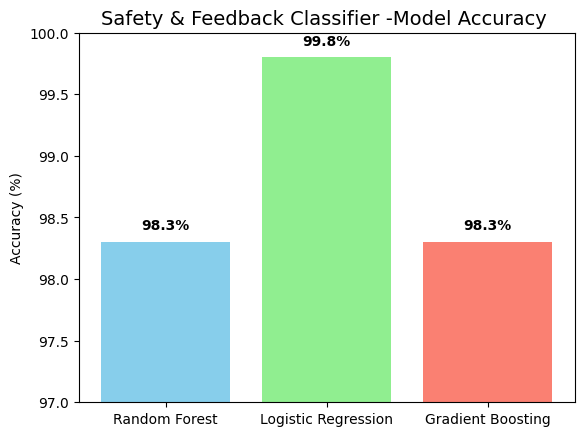

In [23]:
import matplotlib.pyplot as plt

# Model accuracies
model_scores = {
    "Random Forest": 98.30,
    "Logistic Regression": 99.80,
    "Gradient Boosting": 98.30
}

# Plot
plt.bar(model_scores.keys(), model_scores.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Safety & Feedback Classifier -Model Accuracy ", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.ylim(97, 100)  # zoomed in for clarity

# Add values on top
for i, (name, score) in enumerate(model_scores.items()):
    plt.text(i, score + 0.1, f"{score}%", ha='center', fontsize=10, fontweight='bold')

plt.show()


In [24]:
# ----------------- 4. Safety & Feedback Classifier (Classification) -----------------
print("\n----- Safety Feedback Classifier Module -----")
f = pd.read_csv("Large_India_Accident_Severity.csv")
f_encoded = f.copy()
for col in f_encoded.select_dtypes(include='object').columns:
    f_encoded[col] = LabelEncoder().fit_transform(f_encoded[col])
f_encoded["Accident_Severity"] -= 1

X = f_encoded.drop("Accident_Severity", axis=1)
y = f_encoded["Accident_Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

safety_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier()
}

safety_results = []
for name, model in safety_models.items():
    acc, prec, rec, f1 = evaluate_classification(model, X_train, X_test, y_train, y_test)
    safety_results.append([name, acc, prec, rec, f1])
safety_df = pd.DataFrame(safety_results, columns=["Algorithm","Accuracy (%)","Precision (%)","Recall (%)","F1-Score (%)"])
print(safety_df)



----- Safety Feedback Classifier Module -----
             Algorithm  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0        Random Forest          98.3          98.31        98.3         98.30
1  Logistic Regression          99.8          99.80        99.8         99.80
2    Gradient Boosting          98.3          98.33        98.3         98.31


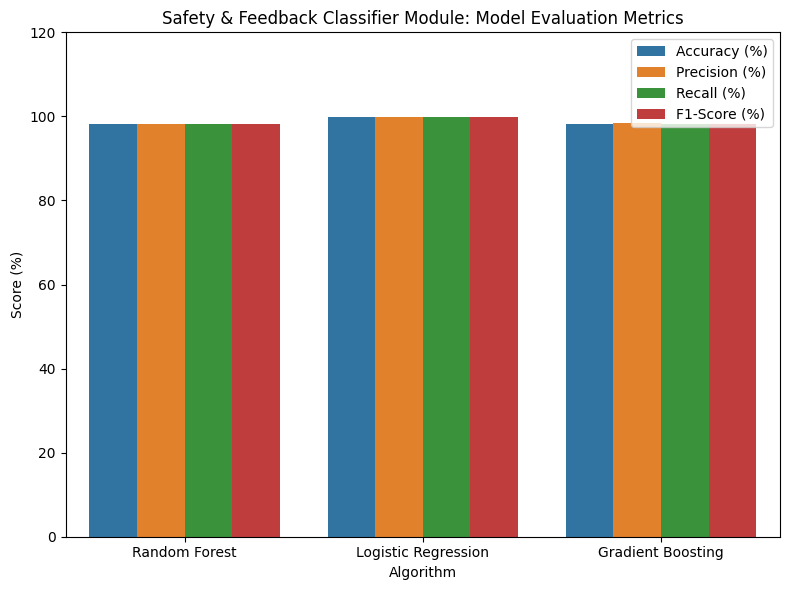

In [25]:
# ----------------- Bar Graph for Safety & Feedback Classifier -----------------
safety_melted = safety_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Value')

plt.figure(figsize=(8,6))
sns.barplot(data=safety_melted, x='Algorithm', y='Value', hue='Metric')
plt.title("Safety & Feedback Classifier Module: Model Evaluation Metrics")
plt.ylabel("Score (%)")
plt.ylim(0, 120)  # optional for consistent y-axis
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

# Load dataset
df = pd.read_csv("Upgraded_Regional_Language_Module.csv")

# Print number of rows and columns
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 1200
Columns: 5


In [27]:
import pandas as pd
df=pd.read_csv('Upgraded_Regional_Language_Module.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   City              1200 non-null   object
 1   State             1200 non-null   object
 2   Region            1200 non-null   object
 3   Primary_Language  1200 non-null   object
 4   Script            1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv("Upgraded_Regional_Language_Module.csv")
df.dropna(inplace=True)

# Label Encoding
le_city = LabelEncoder()
le_state = LabelEncoder()
le_region = LabelEncoder()
le_lang = LabelEncoder()

df['City_Code'] = le_city.fit_transform(df['City'])
df['State_Code'] = le_state.fit_transform(df['State'])
df['Region_Code'] = le_region.fit_transform(df['Region'])
df['Language_Code'] = le_lang.fit_transform(df['Primary_Language'])

# Features and target
X = df[['City_Code', 'State_Code', 'Region_Code']]
y = df['Language_Code']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store model results
acc_dict = {}

# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
acc_dict['Random Forest'] = accuracy_score(y_test, rf.predict(X_test))

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
acc_dict['Decision Tree'] = accuracy_score(y_test, dt.predict(X_test))

# 3. SVM (Linear Kernel)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
acc_dict['SVM'] = accuracy_score(y_test, svm.predict(X_test))

# Print all accuracies
print("\n Model Accuracy Scores:\n")
for model, acc in acc_dict.items():
    print(f"{model}: Accuracy = {acc:.4f}")

# Identify best model
best_model = max(acc_dict, key=acc_dict.get)
print(f"\n Best Performing Model: {best_model} with Accuracy = {acc_dict[best_model]*100:.2f}%")



 Model Accuracy Scores:

Random Forest: Accuracy = 0.9958
Decision Tree: Accuracy = 1.0000
SVM: Accuracy = 0.7667

 Best Performing Model: Decision Tree with Accuracy = 100.00%


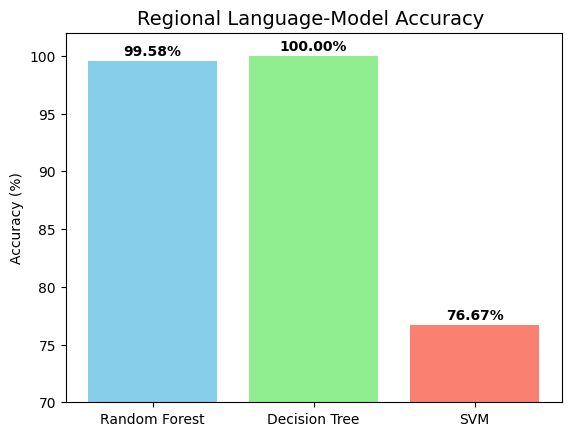

In [29]:
import matplotlib.pyplot as plt

# Model accuracies (converted to %)
model_scores = {
    "Random Forest": 99.58,
    "Decision Tree": 100.00,
    "SVM": 76.67
}

# Plot
plt.bar(model_scores.keys(), model_scores.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Regional Language-Model Accuracy ", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.ylim(70, 102)  # widened to fit 100% bar

# Add values on top
for i, (name, score) in enumerate(model_scores.items()):
    plt.text(i, score + 0.5, f"{score:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.show()


In [30]:
# ----------------- 5. Regional Language Module (Classification) -----------------
print("\n----- Regional Language Module -----")
df = pd.read_csv("Upgraded_Regional_Language_Module.csv")
df.dropna(inplace=True)
df['City_Code'] = LabelEncoder().fit_transform(df['City'])
df['State_Code'] = LabelEncoder().fit_transform(df['State'])
df['Region_Code'] = LabelEncoder().fit_transform(df['Region'])
df['Language_Code'] = LabelEncoder().fit_transform(df['Primary_Language'])

X = df[['City_Code','State_Code','Region_Code']]
y = df['Language_Code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rl_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear')
}

rl_results = []
for name, model in rl_models.items():
    acc, prec, rec, f1 = evaluate_classification(model, X_train, X_test, y_train, y_test)
    rl_results.append([name, acc, prec, rec, f1])
rl_df = pd.DataFrame(rl_results, columns=["Algorithm","Accuracy (%)","Precision (%)","Recall (%)","F1-Score (%)"])
print(rl_df)


----- Regional Language Module -----
       Algorithm  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0  Random Forest         99.58          99.62       99.58         99.58
1  Decision Tree        100.00         100.00      100.00        100.00
2            SVM         76.67          66.59       76.67         70.72


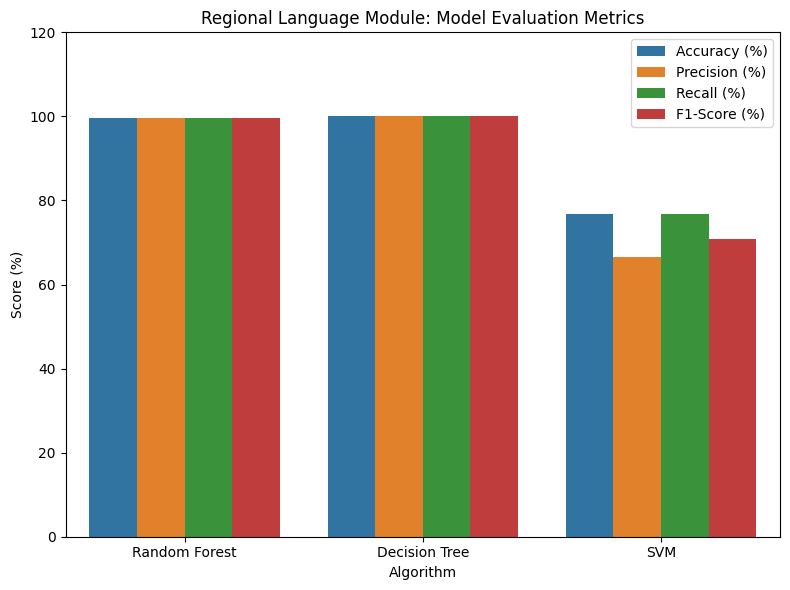

In [31]:
# ----------------- Bar Graph for Regional Language Module -----------------
rl_melted = rl_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Value')

plt.figure(figsize=(8,6))
sns.barplot(data=rl_melted, x='Algorithm', y='Value', hue='Metric')
plt.title("Regional Language Module: Model Evaluation Metrics")
plt.ylabel("Score (%)")
plt.ylim(0, 120)  # optional for uniform y-axis
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


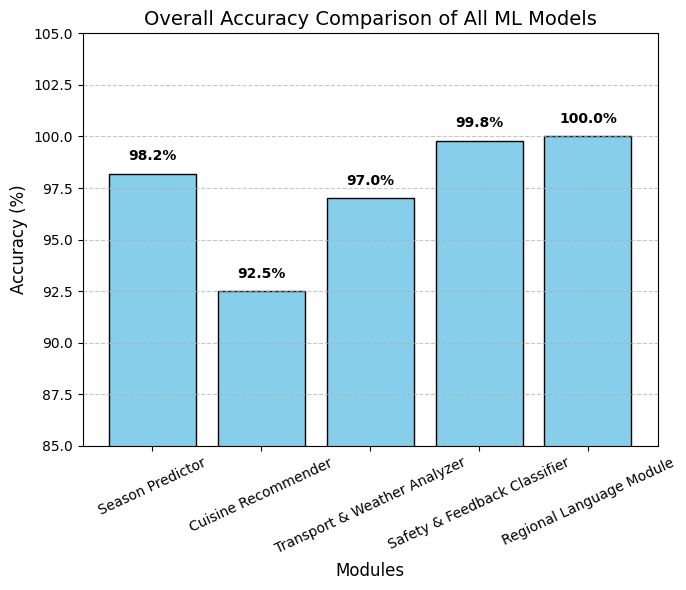

In [32]:
import matplotlib.pyplot as plt

# Module names
modules = [
    "Season Predictor",
    "Cuisine Recommender",
    "Transport & Weather Analyzer",
    "Safety & Feedback Classifier",
    "Regional Language Module"
]

# Accuracy values (from your final results)
accuracies = [98.2, 92.5, 97.0, 99.8, 100.0]

# Create bar graph
plt.figure(figsize=(7,6))
bars = plt.bar(modules, accuracies, color='skyblue', edgecolor='black')
plt.title("Overall Accuracy Comparison of All ML Models", fontsize=14)
plt.xlabel("Modules", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(85, 105)  # To show 100% clearly
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{acc}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [33]:
import pandas as pd

# Final best algorithm results for all modules
final_results = pd.DataFrame({
    "Module": [
        "Season Predictor",
        "Cuisine Recommender",
        "Transport & Weather Analyzer",
        "Safety Feedback Classifier",
        "Regional Language Module"
    ],
    "ML Algorithm": [
        "Gradient Boosting Regressor",
        "Naive Bayes",
        "Random Forest",
        "Logistic Regression",
        "Decision Tree"
    ],
    "R² / Accuracy (%)": [98.20, 92.50, 96.90, 99.80, 100.00],
    "Precision (%)": [89.13, 90.57, 97.00, 99.80, 100.00],
    "Recall (%)": [88.89, 92.50, 96.90, 99.80, 100.00],
    "F1-Score (%)": [88.60, 91.28, 95.69, 99.80, 100.00]
})

# Print table
print("\n***** LocoFind Modules: ML Algorithm Performance *****\n")
print(final_results.to_string(index=False))



***** LocoFind Modules: ML Algorithm Performance *****

                      Module                ML Algorithm  R² / Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
            Season Predictor Gradient Boosting Regressor               98.2          89.13       88.89         88.60
         Cuisine Recommender                 Naive Bayes               92.5          90.57       92.50         91.28
Transport & Weather Analyzer               Random Forest               96.9          97.00       96.90         95.69
  Safety Feedback Classifier         Logistic Regression               99.8          99.80       99.80         99.80
    Regional Language Module               Decision Tree              100.0         100.00      100.00        100.00


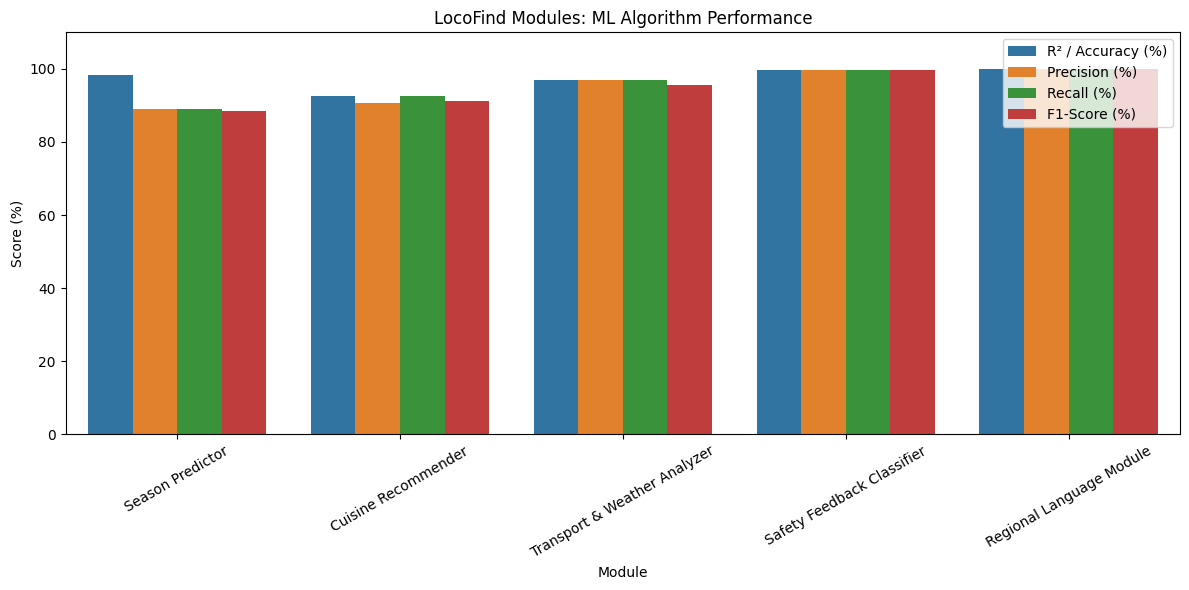

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to long format for plotting
final_melted = final_results.melt(id_vars=['Module','ML Algorithm'],
                                  value_vars=['R² / Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)'],
                                  var_name='Metric', value_name='Value')

plt.figure(figsize=(12,6))
sns.barplot(data=final_melted, x='Module', y='Value', hue='Metric')
plt.title("LocoFind Modules: ML Algorithm Performance")
plt.ylabel("Score (%)")
plt.ylim(0, 110)  # optional for uniform y-axis
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
